In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as pl
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
# mutual_info_classif, mutual_info_regression: Functions for calculating Mutual Information Between classes and the target
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest, SelectPercentile
%matplotlib inline

In [2]:
data = pd.read_csv('data.csv')

In [3]:
X = data.drop(['target','Unnamed: 0'], axis=1)
X.head()

,no_strokes_st,no_strokes_dy,speed_st,speed_dy,magnitude_vel_st,magnitude_horz_vel_st,magnitude_vert_vel_st,magnitude_vel_dy,magnitude_horz_vel_dy,magnitude_vert_vel_dy,...,magnitude_jerk_dy,magnitude_horz_jerk_dy,magnitude_vert_jerk_dy,ncv_st,ncv_dy,nca_st,nca_dy,in_air_stcp,on_surface_st,on_surface_dy
0,12.0,2.0,0.000293,0.000431,0.061342,0.038319,0.039050,0.084891,0.053885,0.052829,...,0.000010,0.000006,0.000006,185.250000,412.857143,61.833333,470.000000,0.0,3678.0,4852.0
1,4.0,6.0,0.000286,0.000281,0.119159,0.077012,0.074216,0.160497,0.101360,0.099211,...,0.000015,0.000010,0.000009,192.777778,173.875000,102.500000,54.000000,0.0,1688.0,1587.0
2,4.0,4.0,0.000278,0.000277,0.113889,0.071547,0.073336,0.191965,0.117724,0.127062,...,0.000051,0.000023,0.000042,263.571429,136.333333,120.500000,25.200000,0.0,2246.0,1332.0
3,4.0,4.0,0.000286,0.000275,0.154621,0.101146,0.096300,0.152413,0.101235,0.091241,...,0.000011,0.000009,0.000005,225.285714,308.400000,59.333333,177.000000,0.0,1775.0,1703.0
4,2.0,2.0,0.000279,0.000270,0.060058,0.039449,0.036737,0.081577,0.052451,0.050634,...,0.000013,0.000010,0.000007,226.700000,168.000000,79.500000,43.857143,0.0,4764.0,3335.0


In [4]:
y = data['target']
y.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: target, dtype: float64

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((61, 29), (61,), (16, 29), (16,))

In [6]:
mutual_info = mutual_info_classif(X_train.fillna(0), y_train)
mutual_info


array([0.0228484 , 0.14112573, 0.18210685, 0.16420309, 0.05564819,
       0.10451337, 0.06936973, 0.06312688, 0.05128623, 0.05760692,
       0.14270778, 0.08749731, 0.08560663, 0.27112519, 0.254735  ,
       0.2605102 , 0.16299146, 0.16101126, 0.14069776, 0.27066743,
       0.25480683, 0.2569802 , 0.1330462 , 0.26268777, 0.03171825,
       0.11365435, 0.23155933, 0.11021035, 0.        ])

In [7]:
mi_series = pd.Series(mutual_info)
mi_series.index = X_train.columns
mi_series.sort_values(ascending=False)

magnitude_acc_dy          0.271125
magnitude_jerk_dy         0.270667
ncv_dy                    0.262688
magnitude_vert_acc_dy     0.260510
magnitude_vert_jerk_dy    0.256980
magnitude_horz_jerk_dy    0.254807
magnitude_horz_acc_dy     0.254735
in_air_stcp               0.231559
speed_st                  0.182107
speed_dy                  0.164203
magnitude_jerk_st         0.162991
magnitude_horz_jerk_st    0.161011
magnitude_acc_st          0.142708
no_strokes_dy             0.141126
magnitude_vert_jerk_st    0.140698
ncv_st                    0.133046
nca_dy                    0.113654
on_surface_st             0.110210
magnitude_horz_vel_st     0.104513
magnitude_horz_acc_st     0.087497
magnitude_vert_acc_st     0.085607
magnitude_vert_vel_st     0.069370
magnitude_vel_dy          0.063127
magnitude_vert_vel_dy     0.057607
magnitude_vel_st          0.055648
magnitude_horz_vel_dy     0.051286
nca_st                    0.031718
no_strokes_st             0.022848
on_surface_dy       

<AxesSubplot:>

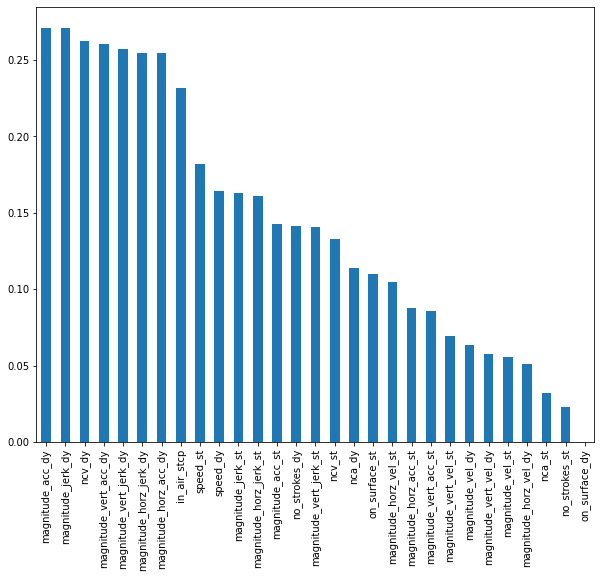

In [8]:
mi_series.sort_values(ascending=False).plot.bar(figsize=(10,8))

In [9]:
# Select K best features
k_best_features = SelectKBest(mutual_info_classif, k=15).fit(X_train.fillna(0), y_train)
print('Selected top 15 features: {}'.format(X_train.columns[k_best_features.get_support()]))

Selected top 15 features: Index(['speed_st', 'speed_dy', 'magnitude_acc_st', 'magnitude_acc_dy',
       'magnitude_horz_acc_dy', 'magnitude_vert_acc_dy', 'magnitude_jerk_st',
       'magnitude_horz_jerk_st', 'magnitude_vert_jerk_st', 'magnitude_jerk_dy',
       'magnitude_horz_jerk_dy', 'magnitude_vert_jerk_dy', 'ncv_st', 'ncv_dy',
       'in_air_stcp'],
      dtype='object')


In [10]:
features=data[['no_strokes_dy', 'magnitude_horz_vel_st', 'magnitude_vert_vel_dy',
       'magnitude_acc_st', 'magnitude_vert_acc_st', 'magnitude_acc_dy',
       'magnitude_horz_acc_dy', 'magnitude_vert_acc_dy', 'magnitude_jerk_st',
       'magnitude_vert_jerk_st', 'magnitude_jerk_dy', 'magnitude_horz_jerk_dy',
       'magnitude_vert_jerk_dy', 'ncv_st', 'on_surface_dy']]
features.head(2)

,no_strokes_dy,magnitude_horz_vel_st,magnitude_vert_vel_dy,magnitude_acc_st,magnitude_vert_acc_st,magnitude_acc_dy,magnitude_horz_acc_dy,magnitude_vert_acc_dy,magnitude_jerk_st,magnitude_vert_jerk_st,magnitude_jerk_dy,magnitude_horz_jerk_dy,magnitude_vert_jerk_dy,ncv_st,on_surface_dy
0,2.0,0.038319,0.052829,0.000375,0.000212,0.000466,0.000305,0.000282,0.000009,0.000005,0.000010,0.000006,0.000006,185.250000,4852.0
1,6.0,0.077012,0.099211,0.000564,0.000327,0.000728,0.000510,0.000409,0.000012,0.000007,0.000015,0.000010,0.000009,192.777778,1587.0


In [11]:
list(features)

['no_strokes_dy',
 'magnitude_horz_vel_st',
 'magnitude_vert_vel_dy',
 'magnitude_acc_st',
 'magnitude_vert_acc_st',
 'magnitude_acc_dy',
 'magnitude_horz_acc_dy',
 'magnitude_vert_acc_dy',
 'magnitude_jerk_st',
 'magnitude_vert_jerk_st',
 'magnitude_jerk_dy',
 'magnitude_horz_jerk_dy',
 'magnitude_vert_jerk_dy',
 'ncv_st',
 'on_surface_dy']

In [12]:
y = data.iloc[:,-1]   


In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler((-1,1))
x=scaler.fit_transform(features)

In [14]:
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score,mean_squared_error
from sklearn.metrics import f1_score
from sklearn.linear_model import LogisticRegression
from xgboost import XGBRFClassifier,XGBClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,ExtraTreesClassifier,GradientBoostingClassifier,RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [15]:
#model_params = {
#     'svm': {
#         'model': svm.SVC(gamma='auto'),
#         'params' : {
#             'C': [1,10,20],
#             'kernel': ['poly','linear','rbf']
#         }  
#     },
#     'xgb': {
#         'model': GradientBoostingClassifier(),
#         'params' : {
#             'learning_rate': [0.01, 0.1, 0.2, 1],
#             'min_samples_split': np.linspace(0.1, 0.5, 10),
#             'max_depth':[3,5,8],
#             'subsample':[0.5, 0.9, 1.0],
#             'n_estimators':[100,1000]
#         }  
  #  },
#     'xgb':{
#         'model':XGBClassifier(),
#             'params':{
#                 'booster':['gblinear'],
#                 'learning_rate': [0.01, 0.1, 0.2, 1],
#                 "max_depth":[3,5,8],
#                 'min_samples_split': np.linspace(0.1, 0.5, 10),
#             }
        
#          },
}
#     'decision_tree': {
#         'model': DecisionTreeClassifier(),
#         'params' : {
            
#              'max_depth':[3,5,8],
#              'criterion':['gini','entropy'],
#              'min_samples_split': np.linspace(0.1, 0.5, 10),
#              'splitter':['best','random'],
#               'random_state':[2,3,4,5,6,7],
#         }
#     },
#     'random_forest': {
#         'model': RandomForestClassifier(),
#         'params' : {
#             'n_estimators': [1,5,10],
#             'max_depth':[3,5,8],
#             'criterion':['gini','entropy'],
#             'min_samples_split': np.linspace(0.1, 0.5, 10),
#             'max_features':['auto','sqrt','log2'],
#             'random_state':[2,3,4,5,6,7],
#         }
            
        
#     },
#      'extra_tree': {
#         'model': ExtraTreesClassifier(),
#         'params' : {
#             'n_estimators': [1,5,10],
#             'max_depth':[3,5,8],
#             'criterion':['gini','entropy'],
#             'min_samples_split': np.linspace(0.1, 0.5, 10),
#             'max_features':['auto','sqrt','log2'],
#             'random_state':[2,3,4,5,6,7],
            
#         }
            
        
#     },
#     'logistic_regression' : {
#         'model': LogisticRegression(solver='liblinear',multi_class='auto'),
#         'params': {
#             'C': [1,5,10]
#         }
#     }
# }

SyntaxError: unmatched '}' (<ipython-input-15-8cf329da9db9>, line 29)

In [ ]:
# scores = []

# for model_name, mp in model_params.items():
#     clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
#     clf.fit(x,y)
#     scores.append({
#         'model': model_name,
#         'best_score': clf.best_score_,
#         'best_params': clf.best_params_
#     })
    
# df = pd.DataFrame(scores,columns=['model','best_params','best_score'])
# df

In [ ]:
#df.to_csv('mutualParam.csv')

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.2, random_state=5)

In [ ]:
xgb=XGBClassifier()
xgb.fit(x_train,y_train)

In [ ]:
y_predtr=xgb.predict(x_train)
print(accuracy_score(y_train,y_predtr)*100)

In [ ]:
xgb_pred=xgb.predict(x_test)
print(accuracy_score(y_test,xgb_pred)*100)

In [ ]:
xgb_conf=confusion_matrix(y_test,xgb_pred)
xgb_conf

In [ ]:
sns.heatmap(xgb_conf, annot=True, annot_kws={"size": 60}) # font size

pl.show()
pl.savefig('xgb_confusion.png')

In [ ]:
print(classification_report(y_test,xgb_pred))

In [ ]:
rfc=RandomForestClassifier(n_estimators=10,criterion='entropy',min_samples_split=.233,
                             max_depth=3,max_features='auto',random_state=4)
rfc.fit(x_train,y_train)

In [ ]:
y_predtr=rfc.predict(x_train)
print(accuracy_score(y_train,y_predtr)*100)

In [ ]:
rfc_pred=rfc.predict(x_test)
print(accuracy_score(y_test,rfc_pred)*100)

In [ ]:
rfc_conf=confusion_matrix(y_test,rfc_pred)
rfc_conf

In [ ]:
sns.heatmap(rfc_conf, annot=True, annot_kws={"size": 60}) # font size

pl.show()
pl.savefig('mutual_rfc.png')

In [ ]:
print(classification_report(y_test,rfc_pred))

In [ ]:
etc=ExtraTreesClassifier(n_estimators=10,criterion='gini',min_samples_split=.233,
                             max_depth=8,max_features='auto',random_state=7)
etc.fit(x_train,y_train)

In [ ]:
y_predtr=etc.predict(x_train)
print(accuracy_score(y_train,y_predtr)*100)

In [ ]:
etc_pred=etc.predict(x_test)
print(accuracy_score(y_test,etc_pred)*100)

In [ ]:
etc_conf=confusion_matrix(y_test,etc_pred)
etc_conf

In [ ]:
sns.heatmap(etc_conf, annot=True, annot_kws={"size": 60}) # font size

pl.show()
pl.savefig('etc_confusion.png')

In [ ]:
print(classification_report(y_test,etc_pred))

In [ ]:
model=DecisionTreeClassifier(random_state= 3)
model.fit(x_train,y_train)


In [ ]:
y_predtr=model.predict(x_train)
print(accuracy_score(y_train,y_predtr)*100)

In [ ]:
y_pred=model.predict(x_test)
print(accuracy_score(y_test, y_pred)*100)

In [ ]:
svm=SVC(kernel='poly')
svm.fit(x_train,y_train)

In [ ]:
y_predtr=svm.predict(x_train)
print(accuracy_score(y_train,y_predtr)*100)

In [ ]:
svm_pred=svm.predict(x_test)
print(accuracy_score(y_test, svm_pred)*100)

In [ ]:
svm_conf=confusion_matrix(y_test,svm_pred)
svm_conf

In [ ]:
sns.heatmap(svm_conf, annot=True, annot_kws={"size": 60}) # font size

pl.show()

In [ ]:
print(classification_report(y_test,svm_pred))

In [ ]:
# input_data = (4852.0,3678.0,0.0,470.000000,61.833333,412.857143,185.250000,12.0,2.0,0.084891)
# input_data_as_numpy_array = np.asarray(input_data)
# input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
# std_data = scaler.transform(input_data_reshaped)
# prediction = model.predict(std_data)
# print(prediction)
# if (prediction[0] == 0):
#   print("The Person does not have Parkinsons Disease")

# else:
#   print("The Person has Parkinsons")
